In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import skew

import seaborn as sns
%matplotlib inline


train= pd.read_csv("/Users/kamakshibansal/UCL/PROJECT/alex_dataset2.csv")



In [36]:
train.head()

,Frame,Critera_pct_RMSE,Quantized_Critera_pct_RMSE,General_Impression_RMSE
0,Original,16.8084,16.7154,0.7823
1,Enhanced,16.9081,16.8491,0.7875
2,Segmentation,17.5478,17.3529,0.7937
3,Segmentation Contour,18.6009,18.4496,0.7762
4,Canny,19.1033,19.0120,0.8772


In [37]:
train["General_Impression_RMSE"]= train["General_Impression_RMSE"] *25

In [38]:
train.head()

,Frame,Critera_pct_RMSE,Quantized_Critera_pct_RMSE,General_Impression_RMSE
0,Original,16.8084,16.7154,19.5575
1,Enhanced,16.9081,16.8491,19.6875
2,Segmentation,17.5478,17.3529,19.8425
3,Segmentation Contour,18.6009,18.4496,19.4050
4,Canny,19.1033,19.0120,21.9300


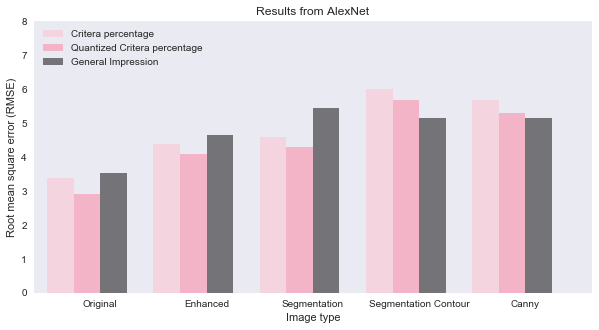

In [39]:
# Setting the positions and width for the bars
train= pd.read_csv("/Users/kamakshibansal/UCL/PROJECT/alex_dataset1_correct.csv")
pos = list(range(len(train['Critera_pct_RMSE'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        train['Critera_pct_RMSE'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='pink',
        # with label the first value in first_name
        label=train['Frame'][0])

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        train['Quantized_Critera_pct_RMSE'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color=(1.0,0.5,0.62),
        # with label the second value in first_name
        label=train['Frame'][1])

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        #using df['post_score'] data,
        train['General_Impression_RMSE'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='black',
        # with label thhird value in first_name
        label=train['Frame'][2])

# Set the y axis label
ax.set_ylabel('Root mean square error (RMSE)')

# Set the chart's title
ax.set_title('Results from AlexNet')
ax.set_xlabel('Image type')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(train['Frame'])

# Setting the x-axis and y-axis limits
#plt.xlim([0, 10])

plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(train['Critera_pct_RMSE'] +  train['Quantized_Critera_pct_RMSE'] + train['General_Impression_RMSE'])] )
plt.ylim([0, 8])

# Adding the legend and showing the plot
plt.legend(['Critera percentage', 'Quantized Critera percentage', 'General Impression'], loc='upper left')
plt.savefig('AlexNet_dataset1.eps',figsize=(23, 20), format='eps', dpi=60)
plt.grid()
#plt.show(cmap='prism')

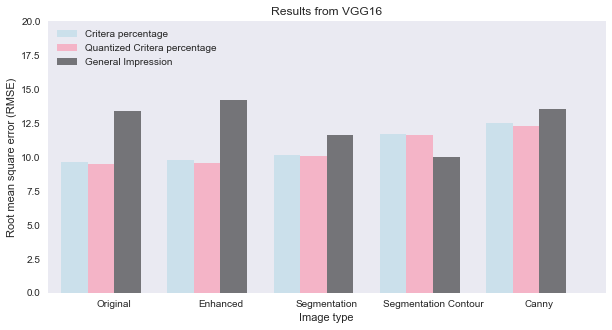

In [29]:
train= pd.read_csv("/Users/kamakshibansal/UCL/PROJECT/VGG16_dataset2_correct.csv")
pos = list(range(len(train['Critera_pct_RMSE'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        train['Critera_pct_RMSE'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='lightblue',
        # with label the first value in first_name
        label=train['Frame'][0])

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        train['Quantized_Critera_pct_RMSE'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color=(1.0,0.5,0.62),
        # with label the second value in first_name
        label=train['Frame'][1])

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        #using df['post_score'] data,
        train['General_Impression_RMSE'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='black',
        # with label thhird value in first_name
        label=train['Frame'][2])

# Set the y axis label
ax.set_ylabel('Root mean square error (RMSE)')

# Set the chart's title
ax.set_title('Results from VGG16')
ax.set_xlabel('Image type')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(train['Frame'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(train['Critera_pct_RMSE'] +  train['Quantized_Critera_pct_RMSE'] + train['General_Impression_RMSE'])] )
plt.ylim([0, 20])
# Adding the legend and showing the plot
plt.legend(['Critera percentage', 'Quantized Critera percentage', 'General Impression'], loc='upper left')
plt.savefig('VGG16_dataset2.eps',figsize=(23, 20), format='eps', dpi=60)
plt.grid()

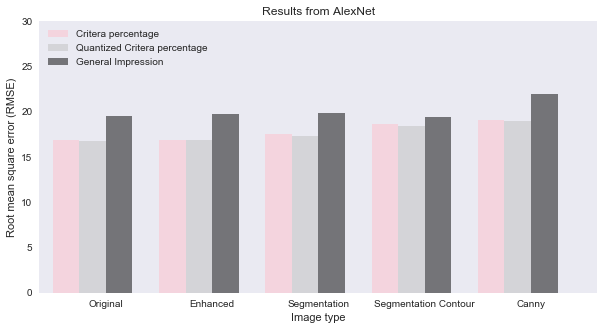

In [14]:
train= pd.read_csv("/Users/kamakshibansal/UCL/PROJECT/alex_dataset2_correct.csv")
pos = list(range(len(train['Critera_pct_RMSE'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        train['Critera_pct_RMSE'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='pink',
        # with label the first value in first_name
        label=train['Frame'][0])

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        train['Quantized_Critera_pct_RMSE'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='silver',
        # with label the second value in first_name
        label=train['Frame'][1])

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        #using df['post_score'] data,
        train['General_Impression_RMSE'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='black',
        # with label thhird value in first_name
        label=train['Frame'][2])

# Set the y axis label
ax.set_ylabel('Root mean square error (RMSE)')

# Set the chart's title
ax.set_title('Results from AlexNet')
ax.set_xlabel('Image type')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(train['Frame'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(train['Critera_pct_RMSE'] +  train['Quantized_Critera_pct_RMSE'] + train['General_Impression_RMSE'])] )
plt.ylim([0, 30])
# Adding the legend and showing the plot
plt.legend(['Critera percentage', 'Quantized Critera percentage', 'General Impression'], loc='upper left')
plt.savefig('AlexNet_dataset2.eps',figsize=(23, 20), format='eps', dpi=60)
plt.grid()

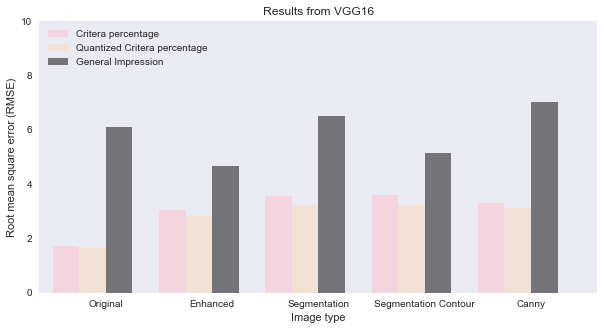

In [38]:
train= pd.read_csv("/Users/kamakshibansal/UCL/PROJECT/VGG16_dataset1_correct.csv")
pos = list(range(len(train['Critera_pct_RMSE'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        train['Critera_pct_RMSE'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='pink',
        # with label the first value in first_name
        label=train['Frame'][0])

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        train['Quantized_Critera_pct_RMSE'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='peachpuff',
        # with label the second value in first_name
        label=train['Frame'][1])

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        #using df['post_score'] data,
        train['General_Impression_RMSE'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='black',
        # with label thhird value in first_name
        label=train['Frame'][2])

# Set the y axis label
ax.set_ylabel('Root mean square error (RMSE)')

# Set the chart's title
ax.set_title('Results from VGG16')
ax.set_xlabel('Image type')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(train['Frame'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(train['Critera_pct_RMSE'] +  train['Quantized_Critera_pct_RMSE'] + train['General_Impression_RMSE'])] )
plt.ylim([0, 10])
# Adding the legend and showing the plot
plt.legend(['Critera percentage', 'Quantized Critera percentage', 'General Impression'], loc='upper left')
plt.savefig('VGG16_dataset1.eps',figsize=(23, 20), format='eps', dpi=60)
plt.grid()

In [168]:
Alex= pd.read_csv("/Users/kamakshibansal/UCL/PROJECT/Data_from_cluster/Alexnet/Alexnet/original_data_frames/Corrected_Predicted_from_Alex.csv")

In [169]:
Alex.head()

,Select_id,Predicted_Class,Predicted_Criteria_Pct,Predicted_Gen_Impression,Ground_truth_Criteria_Pct,Ground_truth_Gen_Impression,Rectified_value,Class
0,bc8_32.jpg,8,69.541702,2.916254,73.333,3.0000,66.667,8
1,ba9_29.jpg,9,82.400734,2.677302,80.000,2.6667,80.000,9
2,bb1_27.jpg,1,70.477753,2.585810,73.333,2.6667,73.333,1
3,dn5_10.jpg,5,26.806828,1.011277,27.778,1.0000,27.778,5
4,dh5_37.jpg,5,98.271744,3.241662,94.444,3.0000,100.000,5


In [173]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [185]:
def save_confusion_matrix(title, classes, true, pred, cmap=plt.cm.Blues,normalize=False):

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=true,
                          y_pred=pred)

    # Print the confusion matrix as text.
    print("confusion matrix: \n", cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    #np.save('inception_cm.npy',cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.savefig(title + '_metrics.eps', bbox_inches='tight', format='eps', dpi=50)
    plt.show()

confusion matrix: 
 [[313   0   0   0   0   0   0   0   0   0]
 [  0 323   0   0   0   0   0   0   0   0]
 [  0   0 292   0   0   0   0   0   0   0]
 [  0   0   0 289   0   0   0   0   0   0]
 [  0   0   0   0 354   0   0   0   0   0]
 [  0   0   0   0   0 337   0   0   0   0]
 [  0   0   0   0   0   0 349   0   0   0]
 [  0   0   0   0   0   0   0 319   0   0]
 [  0   0   0   0   0   0   0   0 297   0]
 [  0   3   0   0   0   0   0   0   0 315]]
Confusion matrix, without normalization
[[313   0   0   0   0   0   0   0   0   0]
 [  0 323   0   0   0   0   0   0   0   0]
 [  0   0 292   0   0   0   0   0   0   0]
 [  0   0   0 289   0   0   0   0   0   0]
 [  0   0   0   0 354   0   0   0   0   0]
 [  0   0   0   0   0 337   0   0   0   0]
 [  0   0   0   0   0   0 349   0   0   0]
 [  0   0   0   0   0   0   0 319   0   0]
 [  0   0   0   0   0   0   0   0 297   0]
 [  0   3   0   0   0   0   0   0   0 315]]


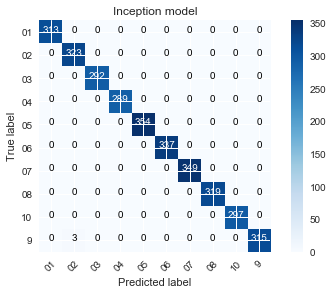

In [187]:
from sklearn.preprocessing import LabelEncoder
import itertools
le = LabelEncoder()
le.fit(['01','02','03','04','05','06','07','08','9','10'])
le.inverse_transform([0,1,2,3,4,5,6,7,8,9])
save_confusion_matrix('Inception model',le.inverse_transform([0,1,2,3,4,5,6,7,8,9]),Alex["Class"].tolist(), Alex["Predicted_Class"].tolist() )

In [178]:
Alex["Predicted_Class"].tolist()

[8,
 9,
 1,
 5,
 5,
 6,
 6,
 6,
 3,
 4,
 7,
 9,
 9,
 5,
 1,
 6,
 5,
 7,
 3,
 3,
 1,
 6,
 4,
 1,
 1,
 5,
 3,
 4,
 3,
 2,
 1,
 6,
 2,
 5,
 7,
 1,
 2,
 2,
 10,
 2,
 8,
 9,
 9,
 10,
 2,
 9,
 9,
 1,
 1,
 2,
 1,
 1,
 9,
 1,
 1,
 7,
 6,
 6,
 5,
 8,
 10,
 2,
 9,
 6,
 5,
 1,
 3,
 10,
 4,
 9,
 4,
 5,
 9,
 8,
 10,
 2,
 10,
 5,
 2,
 4,
 8,
 10,
 8,
 2,
 9,
 2,
 6,
 2,
 7,
 9,
 6,
 9,
 5,
 10,
 10,
 7,
 6,
 1,
 2,
 1,
 7,
 8,
 6,
 1,
 4,
 3,
 2,
 4,
 2,
 3,
 9,
 10,
 5,
 2,
 10,
 8,
 3,
 3,
 5,
 8,
 10,
 10,
 8,
 9,
 9,
 2,
 8,
 4,
 9,
 8,
 6,
 10,
 2,
 3,
 5,
 1,
 1,
 9,
 6,
 7,
 10,
 8,
 5,
 1,
 6,
 4,
 6,
 10,
 8,
 2,
 2,
 2,
 9,
 4,
 2,
 8,
 10,
 2,
 6,
 8,
 7,
 6,
 3,
 3,
 2,
 2,
 4,
 9,
 6,
 4,
 10,
 6,
 9,
 9,
 1,
 3,
 10,
 4,
 3,
 8,
 4,
 6,
 9,
 4,
 2,
 4,
 9,
 2,
 2,
 5,
 2,
 2,
 5,
 4,
 8,
 5,
 3,
 8,
 1,
 5,
 7,
 7,
 7,
 5,
 4,
 4,
 7,
 10,
 7,
 7,
 2,
 4,
 5,
 1,
 6,
 6,
 1,
 8,
 5,
 6,
 6,
 1,
 2,
 10,
 5,
 8,
 7,
 6,
 5,
 2,
 6,
 4,
 3,
 10,
 5,
 9,
 10,
 7,
 1,
 10,
 2,
 2,
 5,
 8,
